<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/CURSO_IBM_DATA_ANALYSIS/IBMDataAnalPythonMod2DATAWRANGLING%20DanielHdezM%20A01793538.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CURSO IBM DATA ANALYSIS WITH PYTHON**

**MODULO 2: DATA WRANGLING**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**
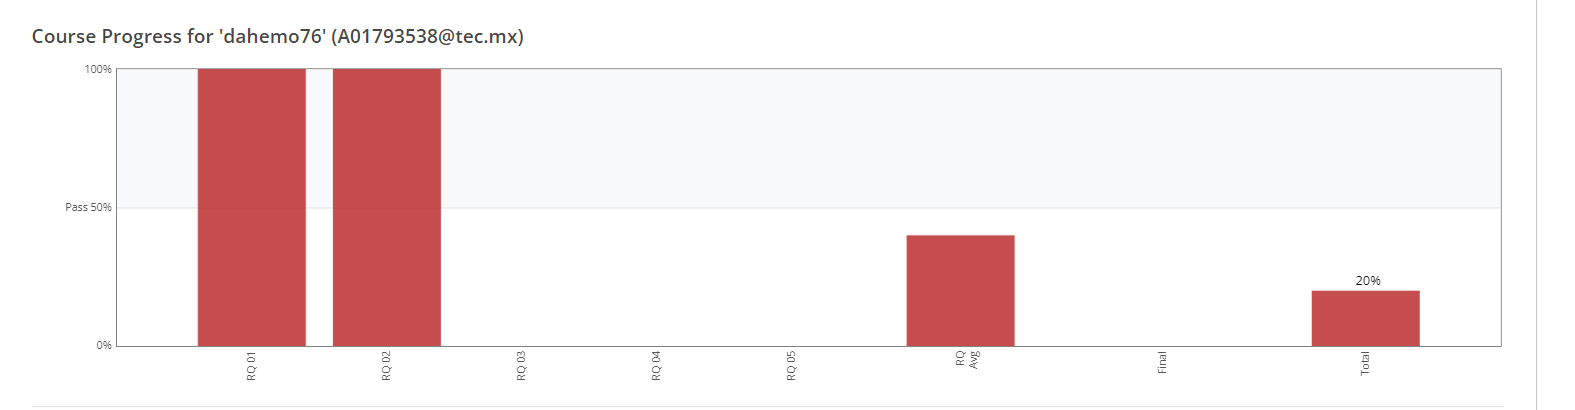

**DATA WRANGLING** 

Es el proceso para procesar la información de un formato inicial a un formato que pueda ser mejor aprovechado en el análisis de los datos

> Para el ejercicio vamos a usar la base de datos " AUtomobile Dataset" disponible en la siguiente liga:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

> Importamos las librerias de pandas y matplotlib

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
df = pd.read_csv(filename, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Etiquetamos cada columna con la lista que creamos con el nombre de headers

In [7]:
df.columns=headers

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##MANEJO DE DATOS PERDIDOS##

> Los pasos para manejar datos faltantes son:

*   Identificar los datos faltantes
*   Manejar los datos faltantes
*   Corregir el formato de los datos



#En la siguiente sección de código vamos a identificar los datos perdido de nuestro Dataset utilizando las funciones de la libreria numpy#

> Vamos a reemplzar los datos que tienen el simbolo de ? por NaN (Not a number)

> ### Importante el argumento de "inplace = True"###

In [9]:
import numpy as np
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


###Creamos un dataset que nos ayude a identificar cuantas celdas no tienen datos###

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Ahora vamos a contabilizar cuantos datos nos hacen falta por columna, donde verdadero significan los datos faltantes y falso los datos válidos###

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#Ahora vamos a procesar las columnas con datos faltantes#

Tenemos 2 opciones para trabajar con los datos faltantes


* Borrar columnas o renglones que tengan datos faltantes
* Reemplazar los datos
  *   Por la media
  *   Por la frecuencia
  *   Basado en otras funciones

###Para el caso del ejercicio vamos a usar los siguientes criterios###

Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean
* "stroke": 4 missing data, replace them with mean
* "bore": 4 missing data, replace them with mean
* "horsepower": 2 missing data, replace them with mean
* "peak-rpm": 2 missing data, replace them with mean

Replace by frequency:

* "num-of-doors": 2 missing data,replace them with "four".
  *  Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

Drop the whole row:

* "price": 4 missing data, simply delete the whole row
  * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us





## Primero se calcula el mean y luego se rellena la columna reemplazando los valores nan ##

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [13]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [14]:
df["normalized-losses"]

0      122.0
1      122.0
2      122.0
3        164
4        164
       ...  
200       95
201       95
202       95
203       95
204       95
Name: normalized-losses, Length: 205, dtype: object

In [15]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [16]:
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [17]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [18]:
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [19]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [20]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)
df["horsepower"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [21]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [22]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

## Vamos ahora a cambiar datos categóricos faltantes por el de más frecuencia para la columna de "num-of-doors", el procedimiento es similar, se reemplazan los valores faltantes##

In [23]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [24]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [25]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [26]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

## En este punto debemos tener nuestro dataframe sin datos faltantes##

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450



# Estandarizacion de los Datos#

## Ahora vamos a  ajustar el formato de los datos y a normalizar los datos que sean enteros o flotantes##

In [28]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## En este punto vamos a cambiar el formato de las columnas bore a flotantes, normalized-losses a enteros, price a flotante y peak-rpm a flotante

In [29]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

##Validamos que efectivamente hayan cambiado##

In [30]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Usando la fórmula L/100Km = 235/mpg vamos a transformar los datos de la columna city-mpg a unidades de l/100Km en vez de usar galones##

In [31]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


##Aplicamos tambien conversion a la columna highway-mpg a un rango de litros en vez de galones##

In [34]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [ ]:
]

**# NORMALIZACION DE DATOS #**
> Es el proceso de llevar los rangos numéricos a un rango definido para que sea facilite el procesamiento posterior y además tengamos escalas de rangos similares


### Vamos  a normalizar los valores de las columnas length, width y height, utilizando el valor maximo como cociente###

In [35]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [37]:
df['height'] = df['height']/df['height'].max()

## Validmaos que efectivamente las columnas esten normalizadas##

In [38]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


##**BINNING**##

> Es el proceso de transformar valores numéricos, ya sea un rango o un valor, a un dato categórico para que podamos clasficarlo o identificarlo facilmente

> En este caso vamos a aplizar Binning a la columna de "horsepover"

Primero nos aseguramos que la columna sea de tipo entero, posteriormente graficaremos con la libreria de matplotlib y haremos el binning

In [39]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

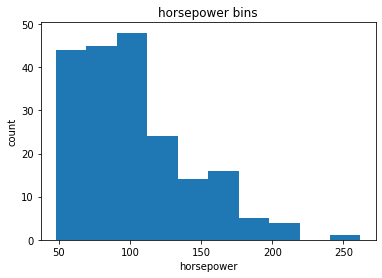

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


## Utilizaremos la funcion de NUMPY linspace(start_value, end_value, numbers_generated, para tener 3 rangos, de 48 a 119, de 119 a 190 o superior, clasificados como low, medium y High##

In [41]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [42]:
# Creamos una lista con los identificadores de los rangos
group_names = ['Low', 'Medium', 'High']

## Aplicamos la función "Cut" que usaran la lista group-names y los rangos establecidos por la función linspace##

In [43]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Ahora podemos visualizar cuantos valores hay de cada rango, para tener una mejor perspectiva del dataframe y lo graficamos

In [44]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

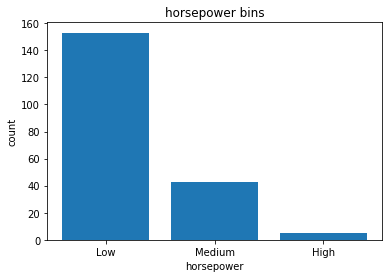

In [45]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Podemos usar un histograma para visualizar los rangos que establecimos en el binning ##

Text(0.5, 1.0, 'horsepower bins')

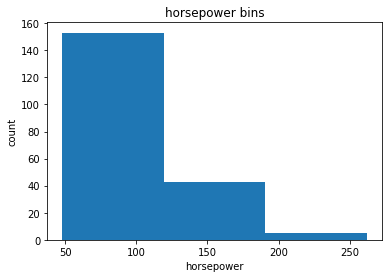

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#** VARIABLES DUMMY **#

> La creación de variables dummy, nor permite crear columnas adicionales con valores numéricos, generalmente 0 o 1, para identificar un valor o una característica y pueda esta información ser usada como análisis por el científico de datos, si asi se considera pertinente.

> En este caso vamos a generar variables dummy para definir el tipo de combustible y si tiene aspiración de aire impulsado por un turbo.

In [47]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

 Creamos un dataframe temporal con los valores dummy asociados al tipo de combustible y posteriormente les ponemos un encabezado para finalmente agregarlos al dataset original y elimar la columna categórica de combustible

In [48]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [49]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [50]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [51]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,9.400000,15250.0,12.368421,Low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,9.400000,17710.0,12.368421,Low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,9.400000,18920.0,12.368421,Low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140,5500.0,17,11.750000,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101,5800.0,23,8.103448,16430.0,10.217391,Low,0,1


HAremos el mismo procedimienot para el caso de aspiración turbo

In [52]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [53]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [54]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


Por ultimo salvamos los datos procesados a un nuevo archivo CSV

In [55]:
df.to_csv('clean_df.csv')